C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Customer_support_data.csv", parse_dates=["Issue_reported at","issue_responded","Survey_response_Date"])
C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].fillna("not specified", inplace

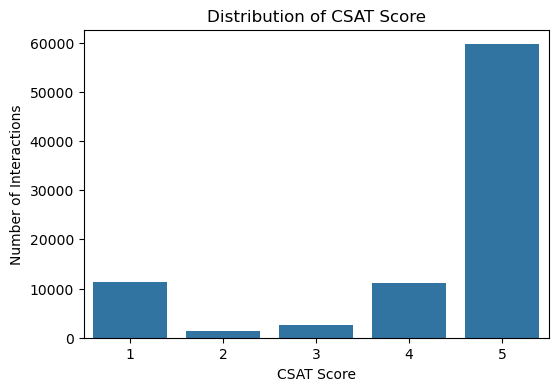

C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_csat, x='CSAT Score', y='category', palette='coolwarm')


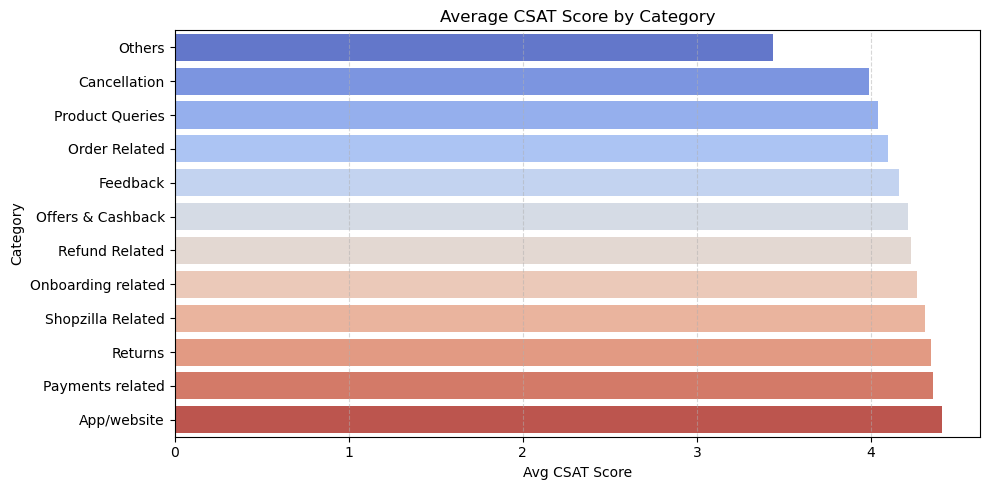

C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_csat, x='CSAT Score', y='Sub-category', palette='viridis')


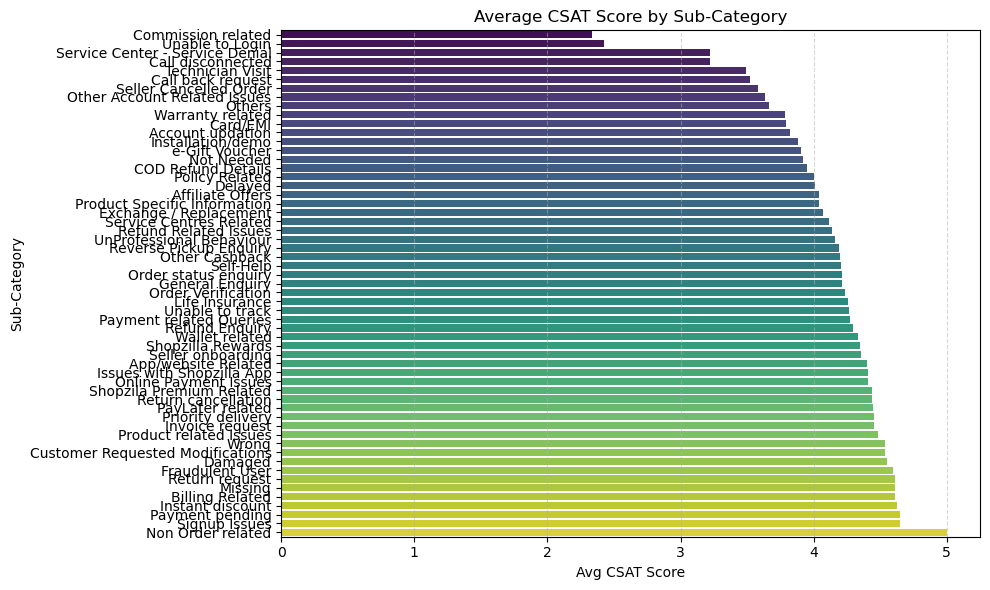

C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_csat, x='CSAT Score', y='channel_name', palette='Blues_d')


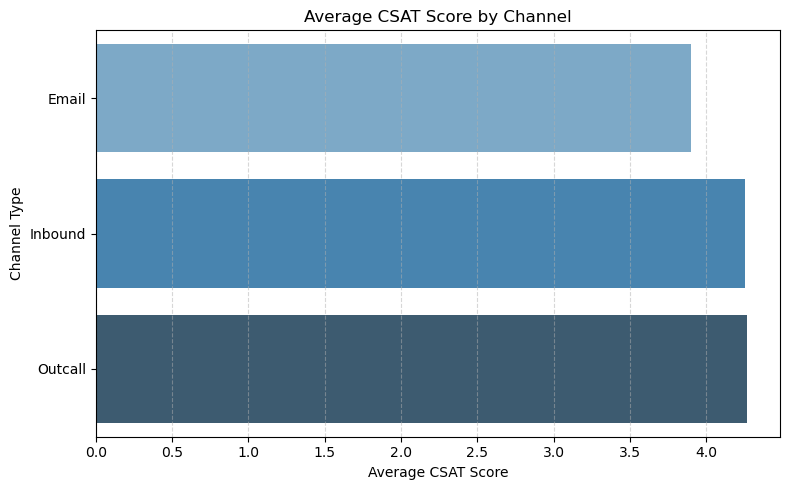

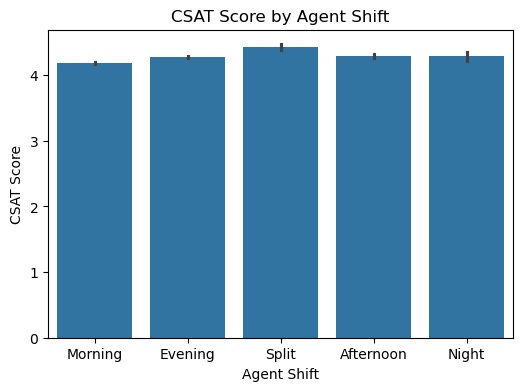

C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agent_csat, x='CSAT Score', y='Agent_name', palette='Reds_r')


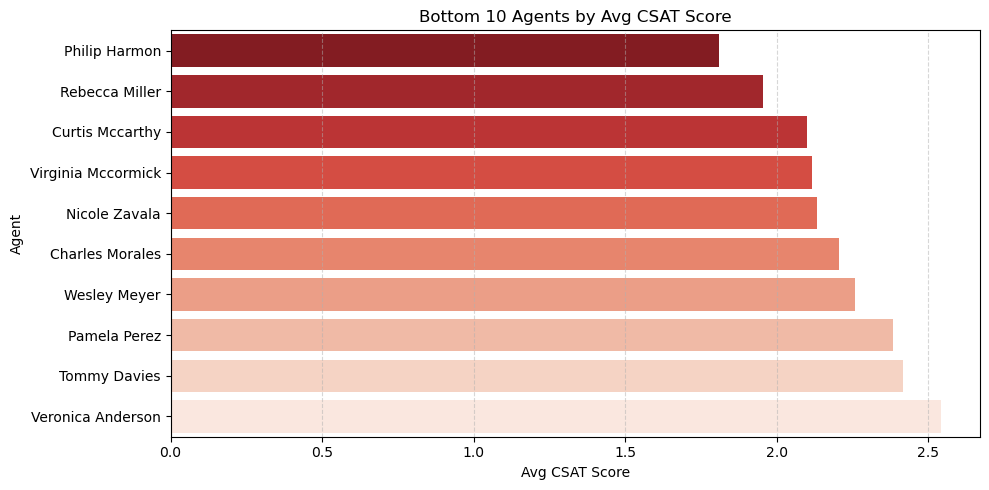

C:\Users\Ankur\AppData\Local\Temp\ipykernel_14220\3607041730.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_csat = df.groupby('response_bucket')['CSAT Score'].mean().reset_index()


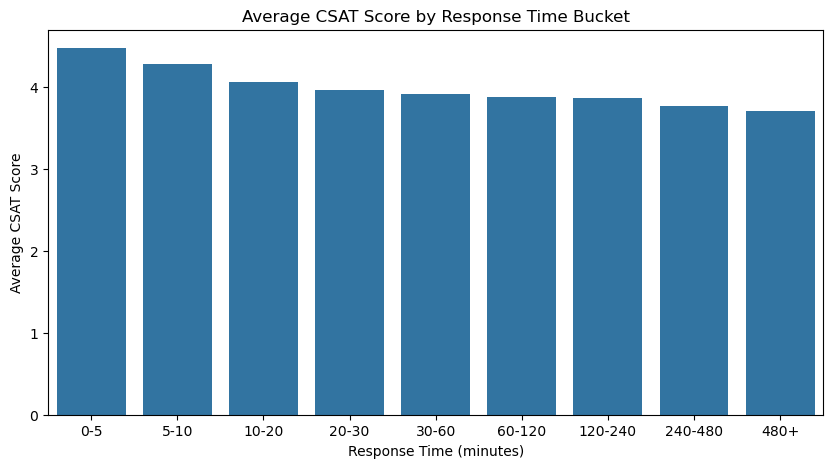

Random Forest R²: 1.0
Gradient Boosting R²: 0.9999999992944869


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("Customer_support_data.csv", parse_dates=["Issue_reported at","issue_responded","Survey_response_Date"])




missing = df.isnull().mean()
df = df.drop(columns=missing[missing>0.6].index)
df["Issue_reported at"] = pd.to_datetime(df["Issue_reported at"], errors= "coerce")
df["issue_responded"] = pd.to_datetime(df["issue_responded"], errors= "coerce")



for columns in df.select_dtypes(include = "object") :
    df[columns].fillna("not specified", inplace=True)

for columns in df.select_dtypes(include= "number"):
    df[columns].fillna(df[columns].median(), inplace = True)

for columns in df.select_dtypes(include= "datetime"):
    df[columns].fillna(pd.Timestamp("1/08/2023"),inplace = True)
df["response_time"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds().fillna(0)/60


plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'CSAT Score')
plt.title("Distribution of CSAT Score")
plt.xlabel("CSAT Score")
plt.ylabel("Number of Interactions")
plt.show()


cat_csat = df.groupby('category')['CSAT Score'].mean().sort_values().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=cat_csat, x='CSAT Score', y='category', palette='coolwarm')
plt.title("Average CSAT Score by Category")
plt.xlabel("Avg CSAT Score")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


subcat_csat  = df.groupby('Sub-category')['CSAT Score'].mean().sort_values().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=subcat_csat, x='CSAT Score', y='Sub-category', palette='viridis')
plt.title("Average CSAT Score by Sub-Category")
plt.xlabel("Avg CSAT Score")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()






channel_csat = df.groupby("channel_name")["CSAT Score"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_csat, x='CSAT Score', y='channel_name', palette='Blues_d')
plt.title("Average CSAT Score by Channel")
plt.xlabel("Average CSAT Score")
plt.ylabel("Channel Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(data=df,x = 'Agent Shift',y = 'CSAT Score')
plt.title("CSAT Score by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("CSAT Score")
plt.show()


agent_csat = df.groupby('Agent_name')['CSAT Score'].mean().sort_values().head(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=agent_csat, x='CSAT Score', y='Agent_name', palette='Reds_r')
plt.title("Bottom 10 Agents by Avg CSAT Score")
plt.xlabel("Avg CSAT Score")
plt.ylabel("Agent")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

df['response_bucket'] = pd.cut(df['response_time'], bins=[0, 5, 10, 20, 30, 60, 120, 240, 480, 10000],labels=['0-5', '5-10', '10-20', '20-30', '30-60', '60-120', '120-240', '240-480', '480+'])
bucket_csat = df.groupby('response_bucket')['CSAT Score'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=bucket_csat, x='response_bucket', y='CSAT Score')
plt.title("Average CSAT Score by Response Time Bucket")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Average CSAT Score")
plt.show()


df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
label_cols = ['tenure_bucket', 'agent_name', 'supervisor', 'manager','sub-category']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=['channel_name', 'category', 'agent_shift'], drop_first=True)
y = df.iloc[:,13]
input_cols = ['tenure_bucket', 'agent_name', 'supervisor', 'manager','sub-category']
encoded_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in ['channel_name', 'category', 'agent_shift'])]
X = df[input_cols + encoded_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gbr))



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF R²: 1.0
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best GBR Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Tuned GBR R²: 0.9999999999999812
